In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Análise dos dados

In [68]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Aqui podemos ver que temos um total de 890 linhas, e que possuímos as colunas:
1. PassengerId: ID do passageiro
2. Survived: 0 = não sobreviveu, 1 = sobreviveu
3. Pclass: Classe do passageiro
4. Name: Nome do passgeiro
5. Sexo: Gênero do passgeiro
6. Age: Idade do passageiro
7. SibSp: Total de irmãos/esposas do passageiro à bordo
8. Parch: Total de pais/filhos do passageiro à bordo
9. Ticket: N° da passagem
10. Fare: Preço da passagem
11. Cabin: N° da cabine
12. Embarked: Cidade em que o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)

In [44]:
#Agora vamos checar se há dados nulos
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Assim vemos que existem valores nulos nas colunas "Cabin", "Age" e "Embarked". E agora faremos uma limpa nos dados

In [65]:
#Como a maioria dos dados da coluna "Cabin" são nulos, iremos apagá-la
train_data.drop("Cabin", axis='columns', inplace=True)

#E removeremos algumas linhas da coluna "Embarked"
train_data.dropna(subset=['Embarked'], inplace=True)

# Preencher valores nulos na coluna "Age" com a média das idades
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

train_data.isnull().sum().sort_values(ascending=False)

Fare           1
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

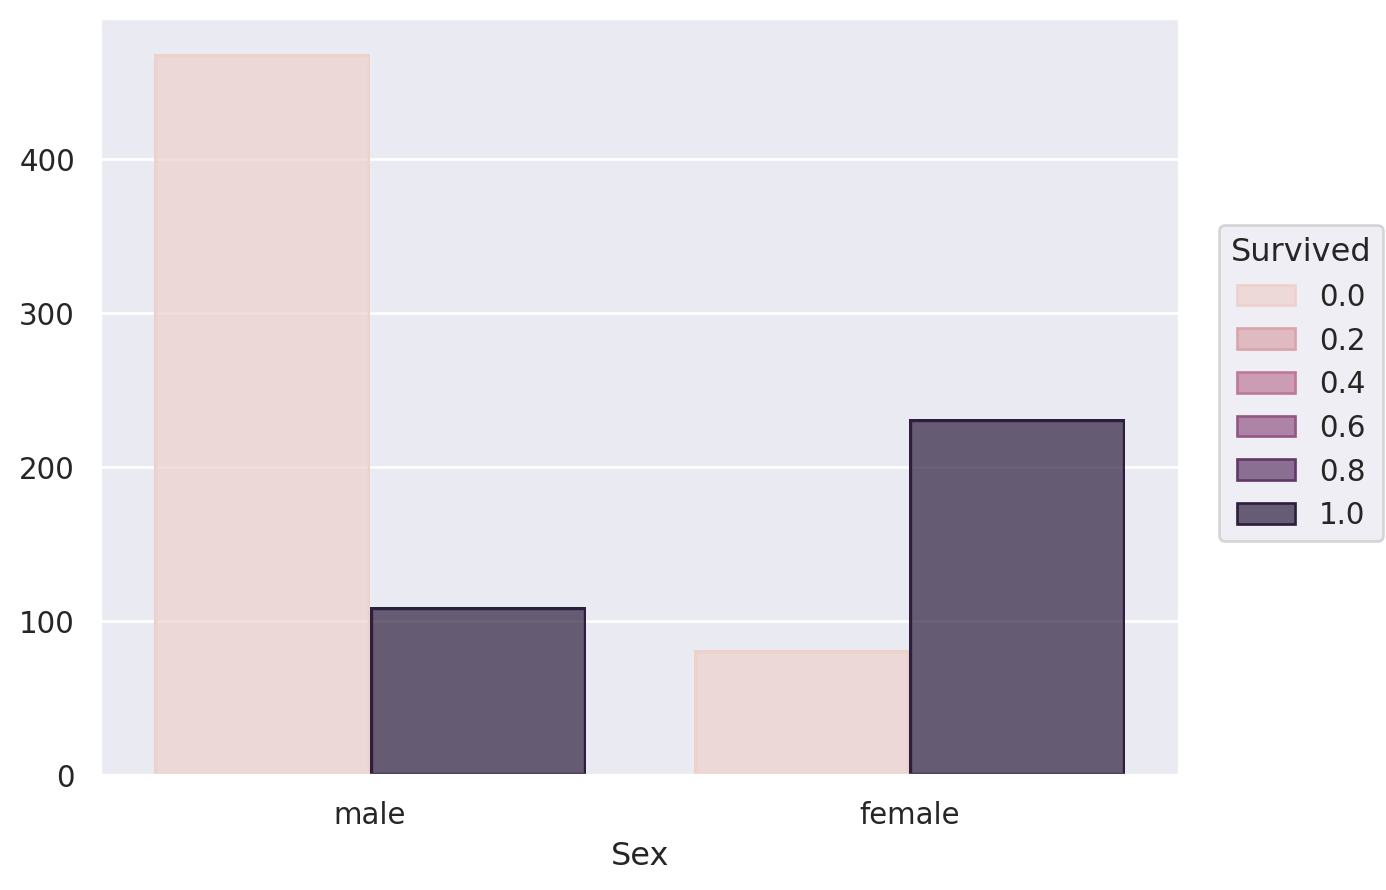

In [46]:
so.Plot(train_data, x="Sex", color="Survived").add(so.Bar(), so.Hist(), so.Dodge())


Com a análise acima podemos ver que a maioria dos sobreviventes foram mulheres

<Figure size 2000x800 with 0 Axes>

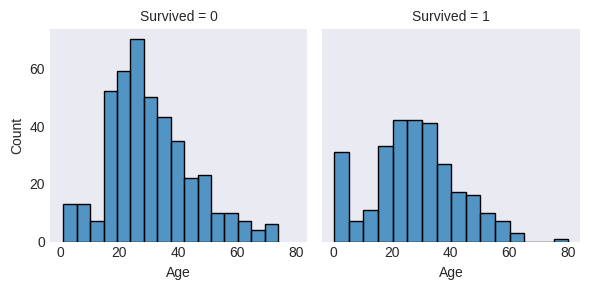

In [47]:
plt.figure( figsize=(20, 8) )

age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived.map(sns.histplot, 'Age')


Aqui nós vemos que a maioria dos sobreviventes são crianças abaixo de 10 anos e adultos entre cerca de 20 à 40 anos, mostrando que eles tinham possivelmente tinham uma preferência em salvar os mais jovens

Text(0.5, 1.0, 'Sobreviventes x Preço do Ticket')

<Figure size 1500x800 with 0 Axes>

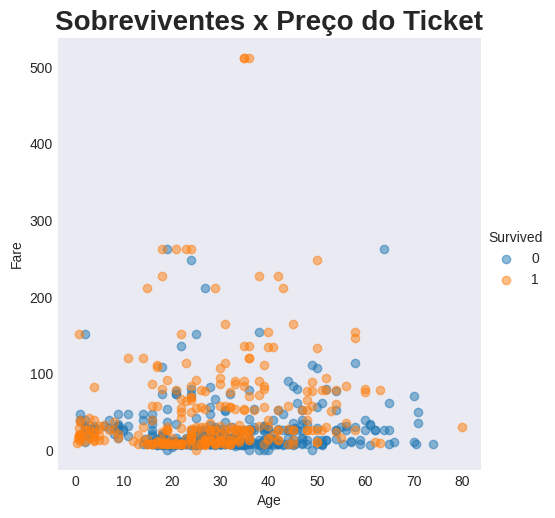

In [48]:
plt.figure( figsize=(15, 8) )


sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_data, fit_reg=False, scatter_kws={'alpha':0.5})
plt.title('Sobreviventes x Preço do Ticket', fontsize=20, fontweight='bold')

E no gráfico acima podemos notar que, apesar de bem distribuído nas faixas de preço mais baixas, grande parte daqueles que pagaram valores mais altos acabaram sobrevivendo

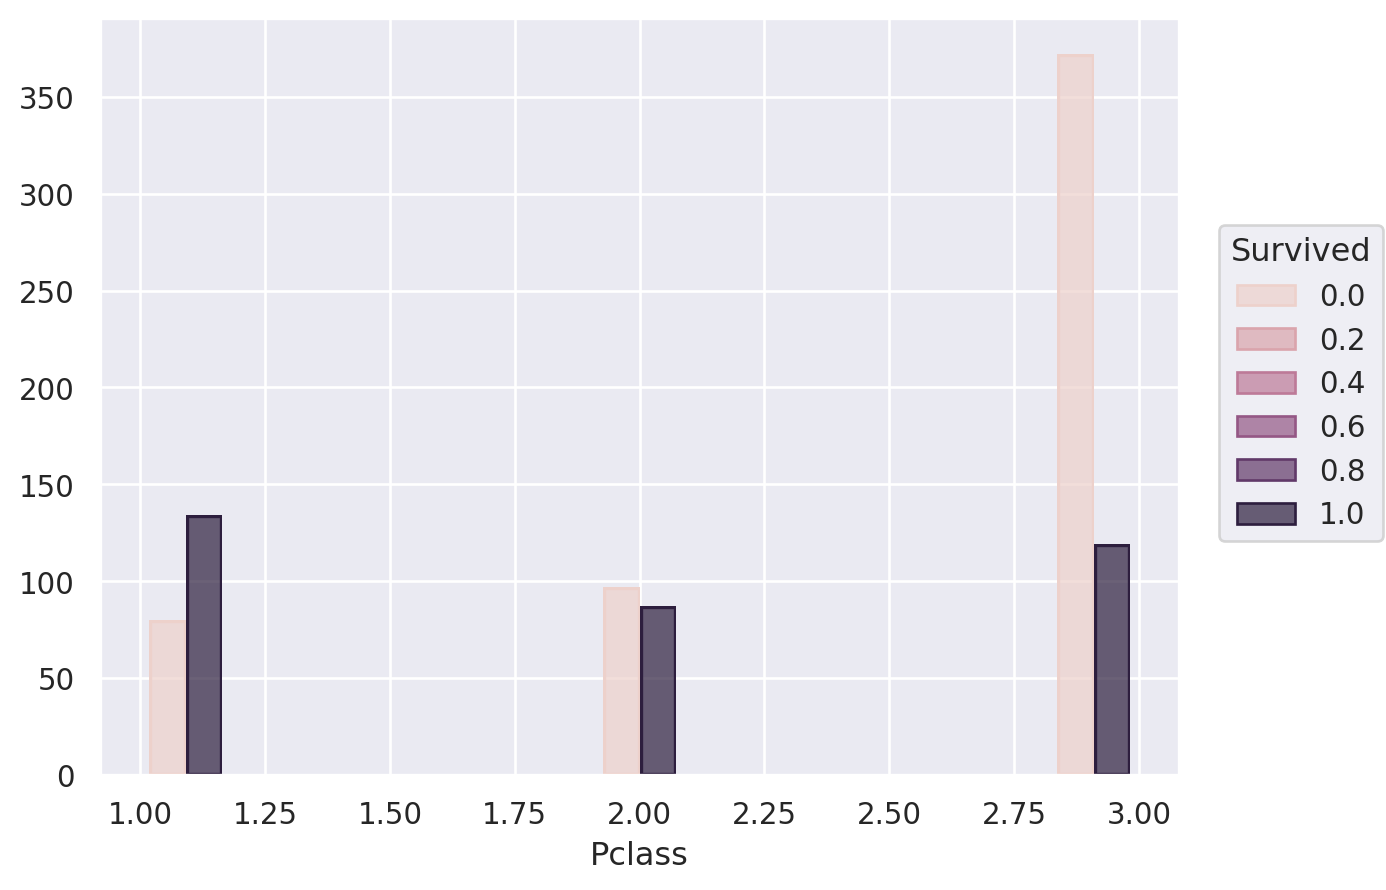

In [49]:
so.Plot(train_data, x="Pclass", color="Survived").add(so.Bar(), so.Hist(), so.Dodge())

E neste vemos novamente que apesar de terem sido salvas um bom número de pessoas de outras classes, e primeira classe teve mais sobreviventes

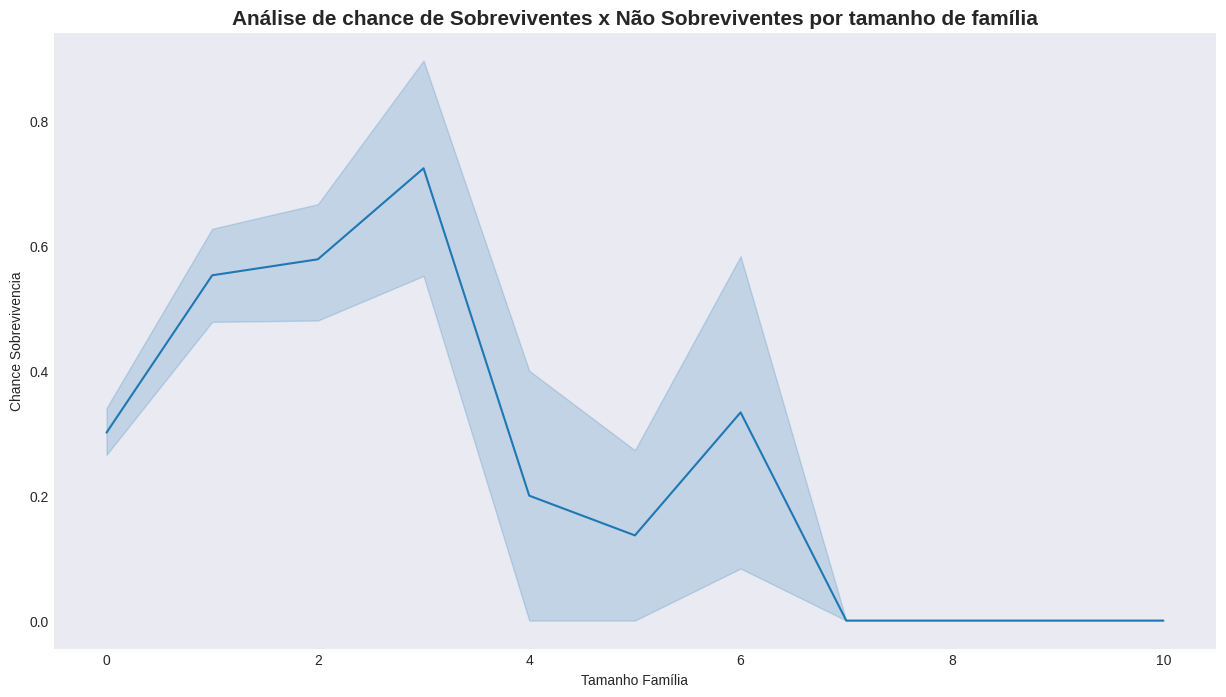

In [59]:
plt.figure( figsize=(15, 8) )

train_data['Family_Size'] = 0
train_data['Family_Size'] = train_data['Parch']+train_data['SibSp']

sns.lineplot(x ='Family_Size', y ='Survived', data = train_data)
plt.title('Análise de chance de Sobreviventes x Não Sobreviventes por tamanho de família', fontsize=15, fontweight='bold')
plt.xlabel('Tamanho Família')
plt.ylabel('Chance Sobrevivencia')
plt.legend()

Aqui nós vemos que aqueles que tinham até cerca de 4 pessoas na família dentro do titanic, tinham mais chances de sobreviver do aqueles com familias maiores

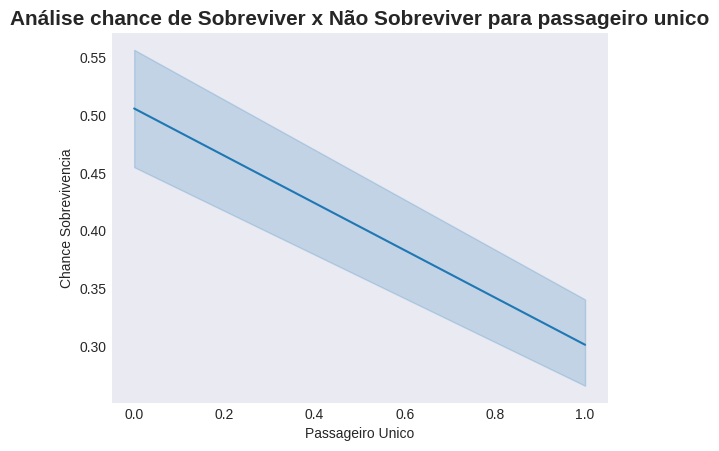

In [62]:
train_data['Alone'] = 0
train_data.loc[train_data.Family_Size == 0, 'Alone'] = 1

sns.lineplot(x ='Alone', y ='Survived', data = train_data)
plt.title('Análise chance de Sobreviver x Não Sobreviver para passageiro unico', fontsize=15, fontweight='bold')
plt.xlabel('Passageiro Unico')
plt.ylabel('Chance Sobrevivencia')
plt.legend()

E neste podemos ver que aqueles que estavam sozinhos, tinham menos chances de sobreviver

# Machine Learning

In [81]:
test_data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Definir as features e o target
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.7988826815642458
